In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Preprocessing

In [2]:
df = pd.read_csv('../../Datasets/rock-vs-mine.csv', header=None)

In [3]:
df.shape
df.head(3)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# Spli X and Y

In [4]:
X = df.drop(60, axis=1)
Y = df[60]
pd.set_option('future.no_silent_downcasting', True)

#Y = Y.replace({'M': 0, 'R': 1}).astype(float) - Did not worked (bad accuracy)
Y = Y.replace({'M': 1, 'R': 0}).astype(float)
Y.value_counts()

60
1.0    111
0.0     97
Name: count, dtype: int64

# Visualize

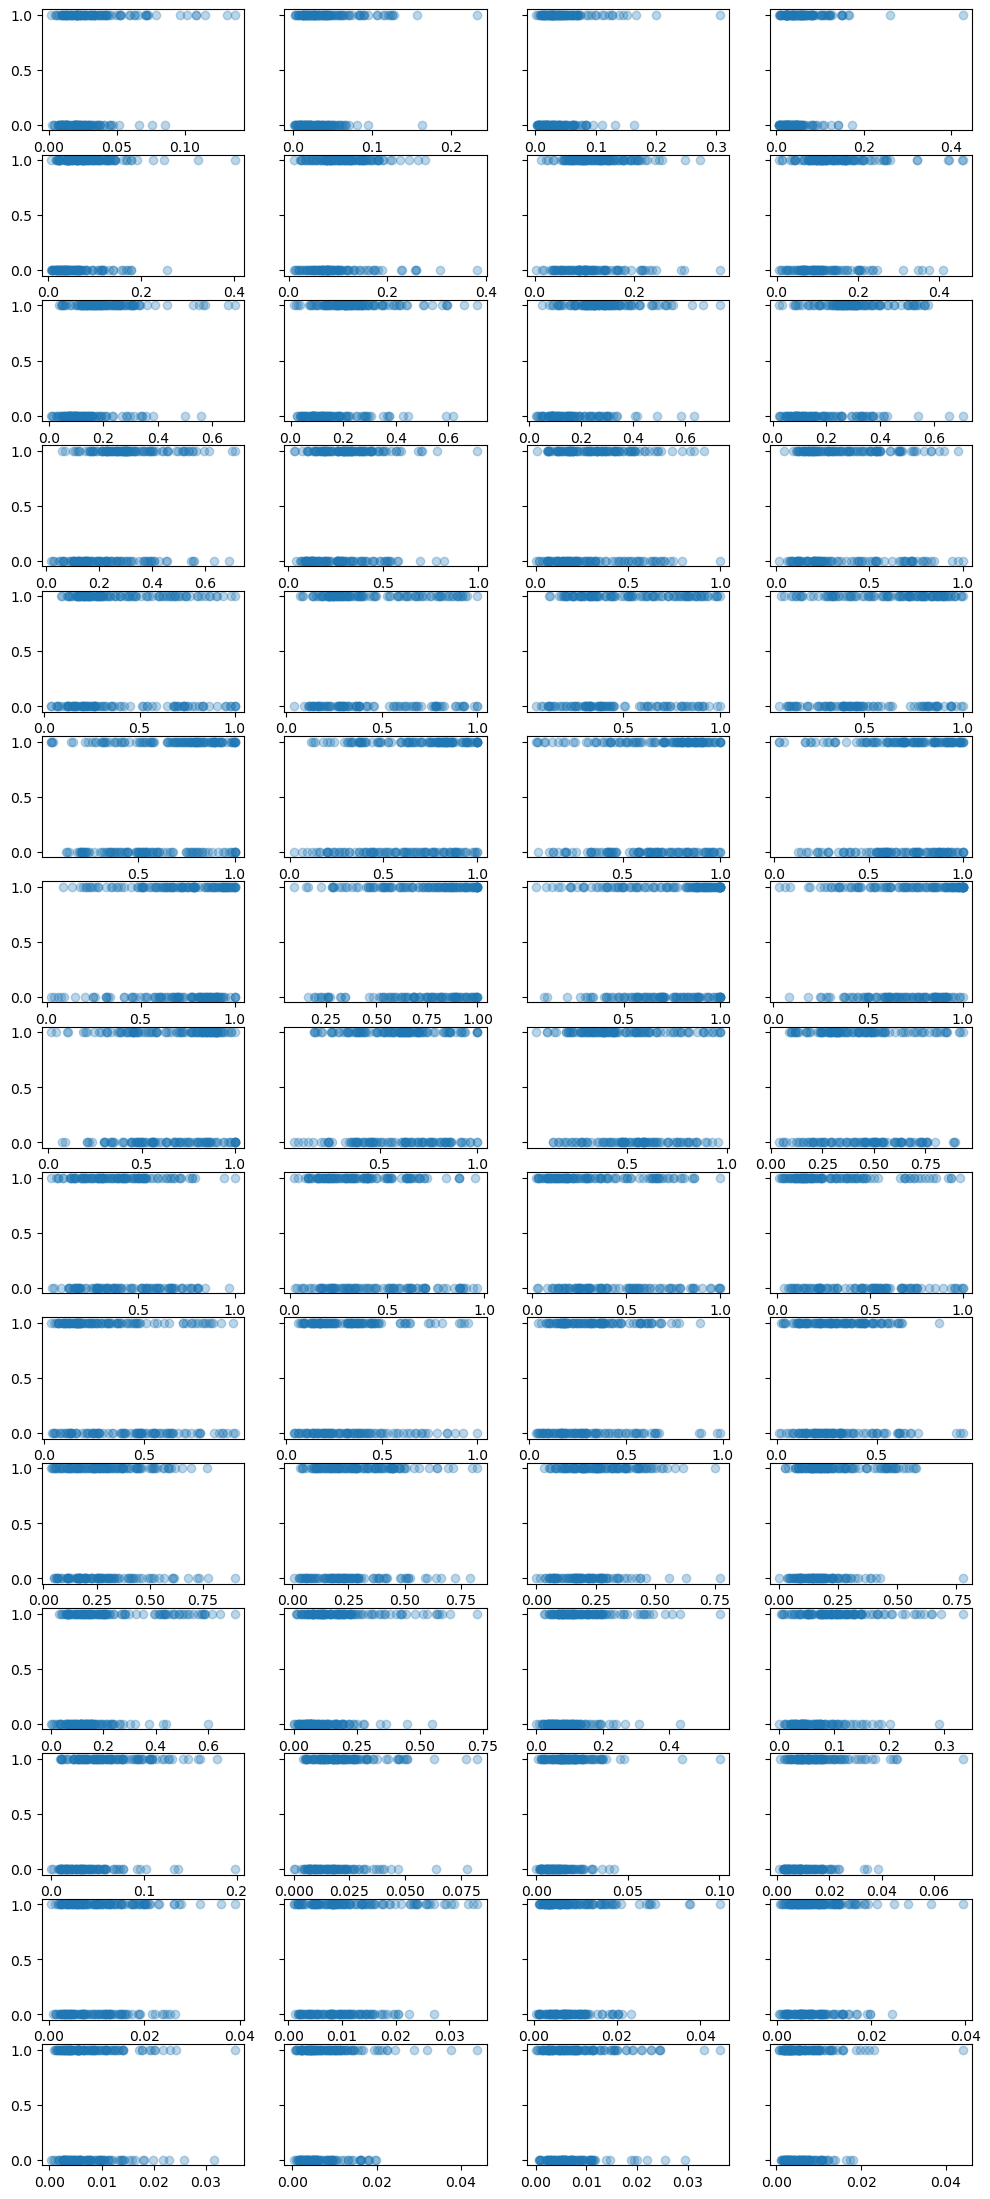

In [5]:
fig, ax = plt.subplots(15, 4, figsize=(12,28), sharey=True)
idx = 0
for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].scatter(X[idx], Y, alpha=0.3)
        idx += 1
plt.show()

# Spliting data into Train and Test

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
Y_test.value_counts()

60
1.0    11
0.0    10
Name: count, dtype: int64

# Training Model

In [7]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [8]:
prediction_on_train_data = lr.predict(X_train)
accuracy_on_train_data = accuracy_score(prediction_on_train_data, Y_train)

prediction_on_test_data = lr.predict(X_test)
accuracy_on_test_data = accuracy_score(prediction_on_test_data, Y_test)

print(f'accuracy on training data: {accuracy_on_train_data}')
print(f'accuracy on test data: {accuracy_on_test_data}')


accuracy on training data: 0.8342245989304813
accuracy on test data: 0.8095238095238095


# Predict

In [9]:
input_data = (0.030,0.023,0.0653,0.0521,0.0611,0.0577,0.05,0.0664,0.1,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.39,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.04,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.48,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if prediction == 1.0:
    print('The object is a Mine')
elif prediction == 0.0:
    print('The object is a Rock')

[1.]
The object is a Mine
